# 붓꽃 (Iris) 데이터 통한 Estimator & Keras model

<p> &nbsp;

# +++++++++++++++++++++++++++++++++++++
    
<p> &nbsp;

# IRIS (붓꽃) data  (교재 49 페이지)

## 데이터를 부르는 여러 방법을 설명하여라.

#### 1. data_in 디렉토리에 있는 iris 데이터를 pandas 로  불러오기
#### 2. from sklearn.datasets import load_iris
#### 3. import tensorflow_datasets as tfds  해서 tfds.load 사용
#### 4. from keras.datasets import mnist, cifar10, reuters, imdb 등


![title](images/iris.png)

## Setup

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow as tf

import numpy as np
import tensorflow_datasets as tfds

print( '사용하는 텐서플로우 버젼 : ', tf.__version__)

사용하는 텐서플로우 버젼 :  2.0.0


## pandas 로 data_in 디렉토리의 파일을 불러서 친구되자.

In [10]:
import pandas as pd

ds_columns = ['SepalLength', 'SepalWidth','PetalLength', 'PetalWidth', 'Plants']
species = np.array(['Setosa', 'Versicolor', 'Virginica'], dtype=np.object)
categories='Plants'

train = pd.read_csv('./data_in/iris_training.csv', names=ds_columns, header=0)
train_plantfeatures, train_categories = train, train.pop(categories)
test = pd.read_csv('./data_in/iris_test.csv', names=ds_columns, header=0)
test_plantfeatures, test_categories = test, test.pop(categories)

In [11]:
#to_categorical 
y_categorical = tf.keras.utils.to_categorical(train_categories, num_classes=3)
y_categorical_test = tf.keras.utils.to_categorical(test_categories, num_classes=3)

In [22]:
print( train_plantfeatures )
print( y_categorical[0:5] )
print( '\n ================ \n')
print( train_plantfeatures.values[0:5] )


     SepalLength  SepalWidth  PetalLength  PetalWidth
0            6.4         2.8          5.6         2.2
1            5.0         2.3          3.3         1.0
2            4.9         2.5          4.5         1.7
3            4.9         3.1          1.5         0.1
4            5.7         3.8          1.7         0.3
..           ...         ...          ...         ...
115          5.5         2.6          4.4         1.2
116          5.7         3.0          4.2         1.2
117          4.4         2.9          1.4         0.2
118          4.8         3.0          1.4         0.1
119          5.5         2.4          3.7         1.0

[120 rows x 4 columns]
[[0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]]


[[6.4 2.8 5.6 2.2]
 [5.  2.3 3.3 1. ]
 [4.9 2.5 4.5 1.7]
 [4.9 3.1 1.5 0.1]
 [5.7 3.8 1.7 0.3]]


### 데이터를 Neural Network 에 적합하도록 전처리를 하자 !!

In [19]:
# Build the dataset
# train

dataset = tf.data.Dataset.from_tensor_slices( (train_plantfeatures.values, y_categorical)  )


dataset = dataset.batch(32)
dataset = dataset.shuffle(1000)
dataset = dataset.repeat()

#test
dataset_test = tf.data.Dataset.from_tensor_slices((test_plantfeatures.values, y_categorical_test))
dataset_test = dataset_test.batch(32)
dataset_test = dataset_test.shuffle(1000)
dataset_test = dataset_test.repeat()

![title](images/irisdnn.png)

## 바로 위는 입력한 4개의 숫자에 3종류 붓꽃의 대응시키는 행렬 변환 !! 

In [23]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(16, input_dim=4),
  tf.keras.layers.Dense(3, activation=tf.nn.softmax),
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                80        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 51        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


### 행렬 변환들을 합성시켜 뉴럴네트워크 모델을 만들과 학습 fit

In [25]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
#eager on
opt = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.001)
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

In [29]:
model.fit(dataset, steps_per_epoch=32, epochs=100, verbose=0)

loss, accuracy = model.evaluate(dataset_test, steps=32)
print("loss:%f"% (loss))
print("accuracy: %f"%   (accuracy))

32/32 [==============================] - 0s 3ms/step - loss: 0.1346 - accuracy: 0.9667
loss:0.134586
accuracy: 0.966667


In [30]:
new_specie = np.array([7.9,3.8,6.4,2.0])
predition = np.around(model.predict(np.expand_dims(new_specie, axis=0))).astype(np.int)[0]
print("This species should be %s" % species[predition.astype(np.bool)][0])

This species should be Virginica


##  IRIS 데이터 전처리의 여러 방법

In [9]:
import pandas as pd

COLUMN_NAMES = [
        'SepalLength', 
        'SepalWidth',
        'PetalLength', 
        'PetalWidth', 
        'Species'
        ]

# Setup feature columns
columns_feat = [
    tf.feature_column.numeric_column(key='SepalLength'),
    tf.feature_column.numeric_column(key='SepalWidth'),
    tf.feature_column.numeric_column(key='PetalLength'),
    tf.feature_column.numeric_column(key='PetalWidth')
]


# Import training dataset
training_dataset = pd.read_csv('./data_in/iris_training.csv', names=COLUMN_NAMES, header=0)
train_x = training_dataset.iloc[:, 0:4]
train_y = training_dataset.iloc[:, 4]

# Import testing dataset
test_dataset = pd.read_csv('./data_in/iris_test.csv', names=COLUMN_NAMES, header=0)
test_x = test_dataset.iloc[:, 0:4]
test_y = test_dataset.iloc[:, 4]

In [11]:
test_x[0:5]

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.9,3.0,4.2,1.5
1,6.9,3.1,5.4,2.1
2,5.1,3.3,1.7,0.5
3,6.0,3.4,4.5,1.6
4,5.5,2.5,4.0,1.3


# ==================================

# Tensorflow 2.* Estimator  for 붓꽃 IRIS

TensorFlow Estimators are fully supported in TensorFlow, and can be created from new and existing `tf.keras` models. This tutorial contains a complete, minimal example of that process.

##  from sklearn.datasets import load_iris 방법

In [52]:
from sklearn.datasets import load_iris

df = load_iris()

# Lib/site-packages/sklearn/datasets/data/iris.csv  에 이미 있는것 부른다
# 이 것은 data_in 에 있는 csv 와 첫줄이 다르다.

print( df['data'][0:5] )
print( df['feature_names'] )

print( df['target'][0:10] )

print( df['target_names'])

# 첫 불에 150, 4,'setosa', 'versicolor', 'virginica'
# 150,4,setosa,versicolor,virginica
# 5.1,3.5,1.4,0.2,0
print( '\n ================ \n')
print( df['DESCR']  )  # describe

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0 0 0 0 0 0 0 0 0 0]
['setosa' 'versicolor' 'virginica']


.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83   

### 바로 위에서 iris_data = load_iris() 하면

### Lib/site-packages/sklearn/datasets/data/iris.csv  에 이미 있는것 부른다
 
### 이 iris.csv 는 data_in 에도 있다. (iris_training.csv, iris_test.csv)  

In [38]:
import pandas as pd

df = pd.read_csv( './data_in/iris.csv' )

df  # dataframe 준말 

,SepalLength,SepalWidth,PentalLength,PentalWidth,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [46]:
print( df['SepalLength'][0:5] )

print( df.describe() ) 

df


0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
Name: SepalLength, dtype: float64
       SepalLength  SepalWidth  PentalLength  PentalWidth     Species
count   150.000000  150.000000    150.000000   150.000000  150.000000
mean      5.843333    3.057333      3.758000     1.199333    1.000000
std       0.828066    0.435866      1.765298     0.762238    0.819232
min       4.300000    2.000000      1.000000     0.100000    0.000000
25%       5.100000    2.800000      1.600000     0.300000    0.000000
50%       5.800000    3.000000      4.350000     1.300000    1.000000
75%       6.400000    3.300000      5.100000     1.800000    2.000000
max       7.900000    4.400000      6.900000     2.500000    2.000000


,SepalLength,SepalWidth,PentalLength,PentalWidth,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [32]:
df.describe() 

,150,4,setosa,versicolor,virginica
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


# Simple Keras model for IRIS (붓꽃) 

In Keras, you assemble *layers* to build *models*. A model is (usually) a graph
of layers. The most common type of model is a stack of layers: the
`tf.keras.Sequential` model.

To build a simple, fully-connected network (i.e. multi-layer perceptron):

In [14]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(4,)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3)
])

Compile the model and get a summary.

In [15]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer='adam')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 16)                80        
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 51        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


## Create an input function  (IRIS 데이터)


Estimators need control of when and how their input pipeline is built. To allow this, they require an "Input function" or `input_fn`. The `Estimator` will call this function with no arguments. The `input_fn` must return a `tf.data.Dataset`.

In [6]:
def input_fn():
  split = tfds.Split.TRAIN
  dataset = tfds.load('iris', split=split, as_supervised=True)
  dataset = dataset.map(lambda features, labels: ({'dense_input':features}, labels))
  dataset = dataset.batch(32).repeat()
  return dataset

Test out your `input_fn`

In [7]:
for features_batch, labels_batch in input_fn().take(1):
  print(features_batch)
  print(labels_batch)

{'dense_input': <tf.Tensor: id=199, shape=(32, 4), dtype=float32, numpy=
array([[6.1, 2.8, 4.7, 1.2],
       [5.7, 3.8, 1.7, 0.3],
       [7.7, 2.6, 6.9, 2.3],
       [6. , 2.9, 4.5, 1.5],
       [6.8, 2.8, 4.8, 1.4],
       [5.4, 3.4, 1.5, 0.4],
       [5.6, 2.9, 3.6, 1.3],
       [6.9, 3.1, 5.1, 2.3],
       [6.2, 2.2, 4.5, 1.5],
       [5.8, 2.7, 3.9, 1.2],
       [6.5, 3.2, 5.1, 2. ],
       [4.8, 3. , 1.4, 0.1],
       [5.5, 3.5, 1.3, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.1, 3.8, 1.5, 0.3],
       [6.3, 3.3, 4.7, 1.6],
       [6.5, 3. , 5.8, 2.2],
       [5.6, 2.5, 3.9, 1.1],
       [5.7, 2.8, 4.5, 1.3],
       [6.4, 2.8, 5.6, 2.2],
       [4.7, 3.2, 1.6, 0.2],
       [6.1, 3. , 4.9, 1.8],
       [5. , 3.4, 1.6, 0.4],
       [6.4, 2.8, 5.6, 2.1],
       [7.9, 3.8, 6.4, 2. ],
       [6.7, 3. , 5.2, 2.3],
       [6.7, 2.5, 5.8, 1.8],
       [6.8, 3.2, 5.9, 2.3],
       [4.8, 3. , 1.4, 0.3],
       [4.8, 3.1, 1.6, 0.2],
       [4.6, 3.6, 1. , 0.2],
       [5.7, 4.4, 1.5, 0.4]]

### Create an Estimator from the tf.keras model.

A `tf.keras.Model` can be trained with the `tf.estimator` API by converting the
model to an `tf.estimator.Estimator` object with
`tf.keras.estimator.model_to_estimator`.

In [11]:
import tempfile

model_dir = tempfile.mkdtemp()

print( model_dir)

keras_estimator = tf.keras.estimator.model_to_estimator(
    keras_model=model, model_dir=model_dir)


########################################################

""" error
model_dir = './model_dir'

keras_estimator = tf.keras.estimator.model_to_estimator(
    keras_model=model, model_dir=model_dir)
"""

C:\Users\Public\Documents\ESTsoft\CreatorTemp\tmpo9l861lf
INFO:tensorflow:Using default config.


INFO:tensorflow:Using default config.


INFO:tensorflow:Using the Keras model provided.


INFO:tensorflow:Using the Keras model provided.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Public\\Documents\\ESTsoft\\CreatorTemp\\tmpo9l861lf', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000014589180B00>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Public\\Documents\\ESTsoft\\CreatorTemp\\tmpo9l861lf', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000014589180B00>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


" error\nmodel_dir = './model_dir'\n\nkeras_estimator = tf.keras.estimator.model_to_estimator(\n    keras_model=model, model_dir=model_dir)\n"

Train and evaluate the estimator.

In [12]:
keras_estimator.train(input_fn=input_fn, steps=500)
eval_result = keras_estimator.evaluate(input_fn=input_fn, steps=10)
print('Eval result: {}'.format(eval_result))

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.


Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Warm-starting with WarmStartSettings: WarmStartSettings(ckpt_to_initialize_from='C:\\Users\\Public\\Documents\\ESTsoft\\CreatorTemp\\tmpo9l861lf\\keras\\keras_model.ckpt', vars_to_warm_start='.*', var_name_to_vocab_info={}, var_name_to_prev_var_name={})


INFO:tensorflow:Warm-starting with WarmStartSettings: WarmStartSettings(ckpt_to_initialize_from='C:\\Users\\Public\\Documents\\ESTsoft\\CreatorTemp\\tmpo9l861lf\\keras\\keras_model.ckpt', vars_to_warm_start='.*', var_name_to_vocab_info={}, var_name_to_prev_var_name={})


INFO:tensorflow:Warm-starting from: C:\Users\Public\Documents\ESTsoft\CreatorTemp\tmpo9l861lf\keras\keras_model.ckpt


INFO:tensorflow:Warm-starting from: C:\Users\Public\Documents\ESTsoft\CreatorTemp\tmpo9l861lf\keras\keras_model.ckpt


INFO:tensorflow:Warm-starting variables only in TRAINABLE_VARIABLES.


INFO:tensorflow:Warm-starting variables only in TRAINABLE_VARIABLES.


INFO:tensorflow:Warm-started 4 variables.


INFO:tensorflow:Warm-started 4 variables.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Public\Documents\ESTsoft\CreatorTemp\tmpo9l861lf\model.ckpt.


INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Public\Documents\ESTsoft\CreatorTemp\tmpo9l861lf\model.ckpt.


INFO:tensorflow:loss = 1.3430656, step = 0


INFO:tensorflow:loss = 1.3430656, step = 0


INFO:tensorflow:global_step/sec: 163.699


INFO:tensorflow:global_step/sec: 163.699


INFO:tensorflow:loss = 0.644048, step = 100 (0.615 sec)


INFO:tensorflow:loss = 0.644048, step = 100 (0.615 sec)


INFO:tensorflow:global_step/sec: 187.066


INFO:tensorflow:global_step/sec: 187.066


INFO:tensorflow:loss = 0.5183943, step = 200 (0.534 sec)


INFO:tensorflow:loss = 0.5183943, step = 200 (0.534 sec)


INFO:tensorflow:global_step/sec: 179.369


INFO:tensorflow:global_step/sec: 179.369


INFO:tensorflow:loss = 0.40938008, step = 300 (0.563 sec)


INFO:tensorflow:loss = 0.40938008, step = 300 (0.563 sec)


INFO:tensorflow:global_step/sec: 184.474


INFO:tensorflow:global_step/sec: 184.474


INFO:tensorflow:loss = 0.40877715, step = 400 (0.536 sec)


INFO:tensorflow:loss = 0.40877715, step = 400 (0.536 sec)


INFO:tensorflow:Saving checkpoints for 500 into C:\Users\Public\Documents\ESTsoft\CreatorTemp\tmpo9l861lf\model.ckpt.


INFO:tensorflow:Saving checkpoints for 500 into C:\Users\Public\Documents\ESTsoft\CreatorTemp\tmpo9l861lf\model.ckpt.


INFO:tensorflow:Loss for final step: 0.30789748.


INFO:tensorflow:Loss for final step: 0.30789748.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2020-03-08T01:24:24Z


INFO:tensorflow:Starting evaluation at 2020-03-08T01:24:24Z


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from C:\Users\Public\Documents\ESTsoft\CreatorTemp\tmpo9l861lf\model.ckpt-500


INFO:tensorflow:Restoring parameters from C:\Users\Public\Documents\ESTsoft\CreatorTemp\tmpo9l861lf\model.ckpt-500


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Evaluation [1/10]


INFO:tensorflow:Evaluation [1/10]


INFO:tensorflow:Evaluation [2/10]


INFO:tensorflow:Evaluation [2/10]


INFO:tensorflow:Evaluation [3/10]


INFO:tensorflow:Evaluation [3/10]


INFO:tensorflow:Evaluation [4/10]


INFO:tensorflow:Evaluation [4/10]


INFO:tensorflow:Evaluation [5/10]


INFO:tensorflow:Evaluation [5/10]


INFO:tensorflow:Evaluation [6/10]


INFO:tensorflow:Evaluation [6/10]


INFO:tensorflow:Evaluation [7/10]


INFO:tensorflow:Evaluation [7/10]


INFO:tensorflow:Evaluation [8/10]


INFO:tensorflow:Evaluation [8/10]


INFO:tensorflow:Evaluation [9/10]


INFO:tensorflow:Evaluation [9/10]


INFO:tensorflow:Evaluation [10/10]


INFO:tensorflow:Evaluation [10/10]


INFO:tensorflow:Finished evaluation at 2020-03-08-01:24:24


INFO:tensorflow:Finished evaluation at 2020-03-08-01:24:24


INFO:tensorflow:Saving dict for global step 500: global_step = 500, loss = 0.2618778


INFO:tensorflow:Saving dict for global step 500: global_step = 500, loss = 0.2618778


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 500: C:\Users\Public\Documents\ESTsoft\CreatorTemp\tmpo9l861lf\model.ckpt-500


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 500: C:\Users\Public\Documents\ESTsoft\CreatorTemp\tmpo9l861lf\model.ckpt-500


Eval result: {'loss': 0.2618778, 'global_step': 500}


# ==============================


# 텐서플로 1.* 코드를 2.* 버젼업하려면 ???


https://www.tensorflow.org/guide/migrate?hl=ko



# ==============================

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/estimator/keras_model_to_estimator"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
</table>

## 붓꽃 데이터 (4차원 벡터) 를 시각화하고 3종류로 분류

In [1]:
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

# One hot encoding
enc = OneHotEncoder()
Y = enc.fit_transform(y[:, np.newaxis]).toarray()

# Scale data to have mean 0 and variance 1 
# which is importance for convergence of the neural network
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, Y, test_size=0.5, random_state=2)

n_features = X.shape[1]
n_classes = Y.shape[1]

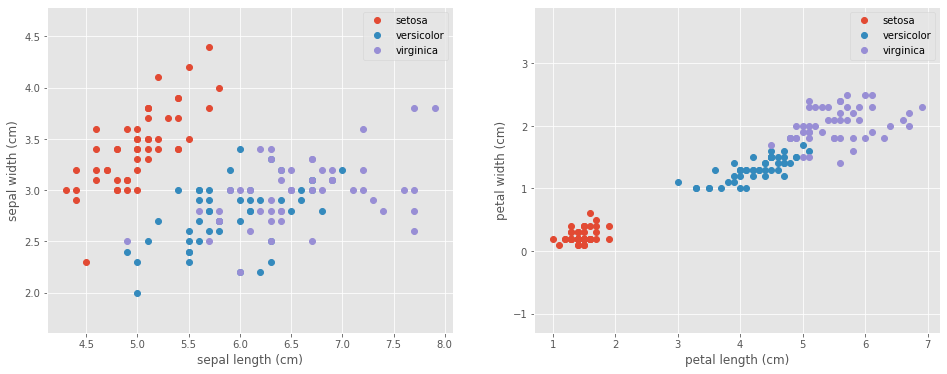

In [2]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

# Visualize the data sets
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    plt.plot(X_plot[:, 0], X_plot[:, 1], linestyle='none', marker='o', label=target_name)
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.axis('equal')
plt.legend();

plt.subplot(1, 2, 2)
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    plt.plot(X_plot[:, 2], X_plot[:, 3], linestyle='none', marker='o', label=target_name)
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[3])
plt.axis('equal')
plt.legend();

# ===================================

# iris 기반 뉴럴네트워크 여러방법을 설명하여라

# ===================================

### 추정기를 사용할 때 텐서플로 1.x의 input_fn(), tf.estimator.TrainSpec, 

### tf.estimator.EvalSpec를 사용할 수 있습니다.

다음은 input_fn을 사용하여 훈련과 평가를 수행하는 예입니다.

### 텐서플로 2.0 : input_fn과 훈련/평가 스펙 만들기

## 손글씨 minist 데이터 기반 뉴럴네트워크

In [3]:
import tensorflow as tf
import tensorflow_datasets as tfds

STEPS_PER_EPOCH = 5

NUM_EPOCHS = 5
    

# 추정기 input_fn을 정의합니다.
# minist 데이처로 한다

def input_fn():
    datasets, info = tfds.load(name='mnist', with_info=True, as_supervised=True)
    mnist_train, mnist_test = datasets['train'], datasets['test']
    
    BUFFER_SIZE = 10000
    BATCH_SIZE = 64
    
    def scale(image, label):
        image = tf.cast(image, tf.float32)
        image /= 255
        
        return image, label[..., tf.newaxis]

    train_data = mnist_train.map(scale).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
    return train_data.repeat()



# 훈련과 평가 스펙을 정의합니다.
train_spec = tf.estimator.TrainSpec(input_fn=input_fn,
                                    max_steps=STEPS_PER_EPOCH * NUM_EPOCHS)
eval_spec = tf.estimator.EvalSpec(input_fn=input_fn,
                                  steps=STEPS_PER_EPOCH)

## 손글씨가 28 by 28 사이즈 : 길이가 784 인 벡터

## 784 짜리 벡터를 0,1,2,...9 숫자에 대응시키는 행렬변환

![title](images/mnist2.png)

In [4]:
def make_model():
    return tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, 3, activation='relu',
                           kernel_regularizer=tf.keras.regularizers.l2(0.02),
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation='softmax')
    ])

In [5]:

model = make_model()


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


##################################################


In [6]:


estimator = tf.keras.estimator.model_to_estimator(
  keras_model = model
)


tf.estimator.train_and_evaluate(estimator, train_spec, eval_spec)



INFO:tensorflow:Using default config.
INFO:tensorflow:Using the Keras model provided.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Public\\Documents\\ESTsoft\\CreatorTemp\\tmpl0c976mg', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000021793E33198>, '_task_type': 'worker', '_task_id': 0, '_global_id_in

INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Warm-starting with WarmStartSettings: WarmStartSettings(ckpt_to_initialize_from='C:\\Users\\Public\\Documents\\ESTsoft\\CreatorTemp\\tmpl0c976mg\\keras\\keras_model.ckpt', vars_to_warm_start='.*', var_name_to_vocab_info={}, var_name_to_prev_var_name={})


INFO:tensorflow:Warm-starting with WarmStartSettings: WarmStartSettings(ckpt_to_initialize_from='C:\\Users\\Public\\Documents\\ESTsoft\\CreatorTemp\\tmpl0c976mg\\keras\\keras_model.ckpt', vars_to_warm_start='.*', var_name_to_vocab_info={}, var_name_to_prev_var_name={})


INFO:tensorflow:Warm-starting from: C:\Users\Public\Documents\ESTsoft\CreatorTemp\tmpl0c976mg\keras\keras_model.ckpt


INFO:tensorflow:Warm-starting from: C:\Users\Public\Documents\ESTsoft\CreatorTemp\tmpl0c976mg\keras\keras_model.ckpt


INFO:tensorflow:Warm-starting variables only in TRAINABLE_VARIABLES.


INFO:tensorflow:Warm-starting variables only in TRAINABLE_VARIABLES.


INFO:tensorflow:Warm-started 8 variables.


INFO:tensorflow:Warm-started 8 variables.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Public\Documents\ESTsoft\CreatorTemp\tmpl0c976mg\model.ckpt.


INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Public\Documents\ESTsoft\CreatorTemp\tmpl0c976mg\model.ckpt.


INFO:tensorflow:loss = 2.8105283, step = 0


INFO:tensorflow:loss = 2.8105283, step = 0


INFO:tensorflow:Saving checkpoints for 25 into C:\Users\Public\Documents\ESTsoft\CreatorTemp\tmpl0c976mg\model.ckpt.


INFO:tensorflow:Saving checkpoints for 25 into C:\Users\Public\Documents\ESTsoft\CreatorTemp\tmpl0c976mg\model.ckpt.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2020-03-08T03:51:34Z


INFO:tensorflow:Starting evaluation at 2020-03-08T03:51:34Z


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from C:\Users\Public\Documents\ESTsoft\CreatorTemp\tmpl0c976mg\model.ckpt-25


INFO:tensorflow:Restoring parameters from C:\Users\Public\Documents\ESTsoft\CreatorTemp\tmpl0c976mg\model.ckpt-25


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Evaluation [1/5]


INFO:tensorflow:Evaluation [1/5]


INFO:tensorflow:Evaluation [2/5]


INFO:tensorflow:Evaluation [2/5]


INFO:tensorflow:Evaluation [3/5]


INFO:tensorflow:Evaluation [3/5]


INFO:tensorflow:Evaluation [4/5]


INFO:tensorflow:Evaluation [4/5]


INFO:tensorflow:Evaluation [5/5]


INFO:tensorflow:Evaluation [5/5]


INFO:tensorflow:Finished evaluation at 2020-03-08-03:51:36


INFO:tensorflow:Finished evaluation at 2020-03-08-03:51:36


INFO:tensorflow:Saving dict for global step 25: accuracy = 0.725, global_step = 25, loss = 1.5354623


INFO:tensorflow:Saving dict for global step 25: accuracy = 0.725, global_step = 25, loss = 1.5354623


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 25: C:\Users\Public\Documents\ESTsoft\CreatorTemp\tmpl0c976mg\model.ckpt-25


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 25: C:\Users\Public\Documents\ESTsoft\CreatorTemp\tmpl0c976mg\model.ckpt-25


INFO:tensorflow:Loss for final step: 0.49371076.


INFO:tensorflow:Loss for final step: 0.49371076.


({'accuracy': 0.725, 'loss': 1.5354623, 'global_step': 25}, [])

### Tensorflow 1.* 버젼의 model_fn을 유지해야 한다면 케라스 모델로 바꿀 수 있습니다.

그러나 호환성 때문에 맞춤형 model_fn은 1.x 스타일의 그래프 모드로 실행될 것입니다. 즉 즉시 실행과 의존성 자동 제어가 없다는 뜻입니다. 맞춤형 model_fn에 케라스 모델을 사용하는 것은 맞춤형 훈련 루프에 사용하는 것과 비슷합니다:

    mode 매개변수에 기초하여 training 상태를 적절하게 지정하세요.
    옵티마이저에 모델의 trainable_variables를 명시적으로 전달하세요.

맞춤형 루프와 큰 차이점은 다음과 같습니다:

    model.losses를 사용하는 대신 tf.keras.Model.get_losses_for 사용하여 손실을 추출하세요.
    tf.keras.Model.get_updates_for를 사용하여 모델의 업데이트 값을 추출하세요.
    
노트: "업데이트(update)"는 각 배치가 끝난 후에 모델에 적용해야 할 변화량입니다. 예를 들면 tf.keras.layers.BatchNormalization 층에서 평균과 분산의 이동 평균(moving average)이 있습니다. Tensorflow 2.* 버젼을 tf 로 불렀기에, 잠시 버젼 1.* 기능을 불러오려면 tf.compat.v1. 표현으로 버젼 1.* 기능을 사용합니다. 

### 다음은 tf.compat.v1 로  기존의 model_fn 으로부터 estimator 만드는 개념을 보여 줍니다.



In [7]:
def my_model_fn(features, labels, mode):
    
  model = make_model()

  optimizer = tf.compat.v1.train.AdamOptimizer()
  loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()

  training = (mode == tf.estimator.ModeKeys.TRAIN)
  predictions = model(features, training=training)

  reg_losses = model.get_losses_for(None) + model.get_losses_for(features)
  total_loss = loss_fn(labels, predictions) + tf.math.add_n(reg_losses)

  accuracy = tf.compat.v1.metrics.accuracy(labels=labels,
                                           predictions=tf.math.argmax(predictions, axis=1),
                                           name='acc_op')

  update_ops = model.get_updates_for(None) + model.get_updates_for(features)

  with tf.control_dependencies(update_ops):
    train_op = optimizer.minimize(
        total_loss,
        var_list=model.trainable_variables,
        global_step=tf.compat.v1.train.get_or_create_global_step())

  return tf.estimator.EstimatorSpec(
    mode=mode,
    predictions=predictions,
    loss=total_loss,
    train_op=train_op, eval_metric_ops={'accuracy': accuracy})



In [8]:
# 추정기를 만들고 훈련합니다.

estimator = tf.estimator.Estimator(model_fn=my_model_fn)


tf.estimator.train_and_evaluate(estimator, train_spec, eval_spec)


INFO:tensorflow:Using default config.


INFO:tensorflow:Using default config.


INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Public\\Documents\\ESTsoft\\CreatorTemp\\tmpxgg8b1qh', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000021795BD7AC8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Public\\Documents\\ESTsoft\\CreatorTemp\\tmpxgg8b1qh', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000021795BD7AC8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Not using Distribute Coordinator.


INFO:tensorflow:Not using Distribute Coordinator.


INFO:tensorflow:Running training and evaluation locally (non-distributed).


INFO:tensorflow:Running training and evaluation locally (non-distributed).


INFO:tensorflow:Start train and evaluate loop. The evaluate will happen after every checkpoint. Checkpoint frequency is determined based on RunConfig arguments: save_checkpoints_steps None or save_checkpoints_secs 600.


INFO:tensorflow:Start train and evaluate loop. The evaluate will happen after every checkpoint. Checkpoint frequency is determined based on RunConfig arguments: save_checkpoints_steps None or save_checkpoints_secs 600.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Public\Documents\ESTsoft\CreatorTemp\tmpxgg8b1qh\model.ckpt.


INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Public\Documents\ESTsoft\CreatorTemp\tmpxgg8b1qh\model.ckpt.


INFO:tensorflow:loss = 2.6776743, step = 0


INFO:tensorflow:loss = 2.6776743, step = 0


INFO:tensorflow:Saving checkpoints for 25 into C:\Users\Public\Documents\ESTsoft\CreatorTemp\tmpxgg8b1qh\model.ckpt.


INFO:tensorflow:Saving checkpoints for 25 into C:\Users\Public\Documents\ESTsoft\CreatorTemp\tmpxgg8b1qh\model.ckpt.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2020-03-08T03:51:54Z


INFO:tensorflow:Starting evaluation at 2020-03-08T03:51:54Z


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from C:\Users\Public\Documents\ESTsoft\CreatorTemp\tmpxgg8b1qh\model.ckpt-25


INFO:tensorflow:Restoring parameters from C:\Users\Public\Documents\ESTsoft\CreatorTemp\tmpxgg8b1qh\model.ckpt-25


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Evaluation [1/5]


INFO:tensorflow:Evaluation [1/5]


INFO:tensorflow:Evaluation [2/5]


INFO:tensorflow:Evaluation [2/5]


INFO:tensorflow:Evaluation [3/5]


INFO:tensorflow:Evaluation [3/5]


INFO:tensorflow:Evaluation [4/5]


INFO:tensorflow:Evaluation [4/5]


INFO:tensorflow:Evaluation [5/5]


INFO:tensorflow:Evaluation [5/5]


INFO:tensorflow:Finished evaluation at 2020-03-08-03:51:56


INFO:tensorflow:Finished evaluation at 2020-03-08-03:51:56


INFO:tensorflow:Saving dict for global step 25: accuracy = 0.325, global_step = 25, loss = 1.7400749


INFO:tensorflow:Saving dict for global step 25: accuracy = 0.325, global_step = 25, loss = 1.7400749


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 25: C:\Users\Public\Documents\ESTsoft\CreatorTemp\tmpxgg8b1qh\model.ckpt-25


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 25: C:\Users\Public\Documents\ESTsoft\CreatorTemp\tmpxgg8b1qh\model.ckpt-25


INFO:tensorflow:Loss for final step: 0.6245468.


INFO:tensorflow:Loss for final step: 0.6245468.


({'accuracy': 0.325, 'loss': 1.7400749, 'global_step': 25}, [])

## 손글씨를 기반으로 하는 뉴럴네트워크의 convolution 접근은 무엇인가  ?